In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font",size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn import metrics

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/gkrishna9790/Logistic-Regression-Binary-Classification/master/Archieve/banking.csv")

In [4]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [5]:
data.duplicated().sum()

12

In [6]:
data = data.drop_duplicates()

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(41176, 21)

In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp_var_rate    41176 non-null  float64
 16  cons_price_idx  41176 non-null  float64
 17  cons_conf_idx   41176 non-null  floa

In [11]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [12]:
data.job.value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [13]:
data.marital.value_counts()

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

In [14]:
data.education.value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [15]:
data.default.value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

In [16]:
data.housing.value_counts()

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64

In [17]:
data.loan.value_counts()

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

In [18]:
data.contact.value_counts()

contact
cellular     26135
telephone    15041
Name: count, dtype: int64

contact
cellular     26135
telephone    15041
Name: count, dtype: int64


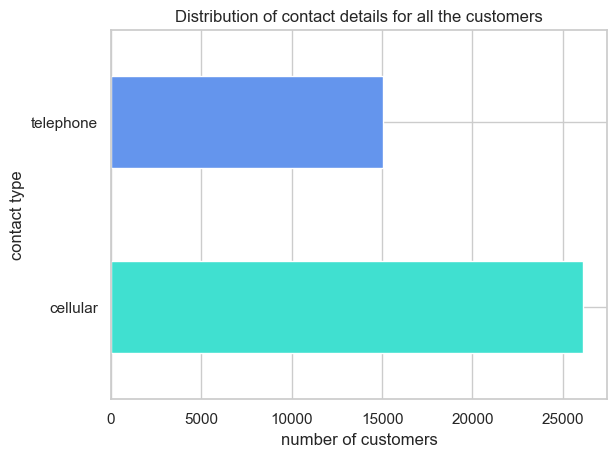

In [19]:
print(data.contact.value_counts())
data.contact.value_counts().plot(kind = 'barh', color = ['#40E0D0', '#6495ED'])
plt.title('Distribution of contact details for all the customers')
plt.ylabel('contact type')
plt.xlabel('number of customers')
plt.show()

In [20]:
data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [21]:
data['education']=np.where(data['education']=='basic.9y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.6y','Basic',data['education'])
data['education']=np.where(data['education']=='basic.4y','Basic',data['education'])

In [22]:
data.education.value_counts()

education
Basic                  12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [23]:
data['education'] = data['education'].str.replace(".", "_")

In [24]:
data['education'].value_counts()

education
Basic                  12512
university_degree      12164
high_school             9512
professional_course     5240
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [25]:
data.reset_index(inplace = True)

In [26]:
data = data.drop(columns = 'index')

In [27]:
data['row_num'] = pd.Series(range(1,41180,1))

In [28]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,row_num
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,1
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,2
2,28,management,single,university_degree,no,yes,no,cellular,jun,thu,...,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,3
3,39,services,married,high_school,no,no,no,cellular,apr,fri,...,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,4
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,...,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,59,retired,married,high_school,unknown,no,yes,telephone,jun,thu,...,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0,41172
41172,31,housemaid,married,Basic,unknown,no,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0,41173
41173,42,admin.,single,university_degree,unknown,yes,yes,telephone,may,wed,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,41174
41174,48,technician,married,professional_course,no,no,yes,telephone,oct,tue,...,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0,41175


# Separate the categorical and numerical variables

In [29]:
categorical = [var for var in data.columns if data[var].dtypes == 'O']

In [30]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [31]:
cat_data = data[categorical]

In [32]:
numerical = [var for var in data.columns if data[var].dtypes != 'O']

In [33]:
numerical

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y',
 'row_num']

In [34]:
num_data = data[numerical]

In [35]:
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university_degree,no,yes,no,cellular,jun,thu,success
3,services,married,high_school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,Basic,no,yes,no,cellular,aug,fri,success


In [36]:
num_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,row_num
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,2
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,3
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,4
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,5


In [37]:
cat_data.shape

(41176, 10)

In [38]:
num_data.shape

(41176, 12)

# ***Outlier Detection and Treatment on the numerical data***

In [39]:
num_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'row_num'],
      dtype='object')

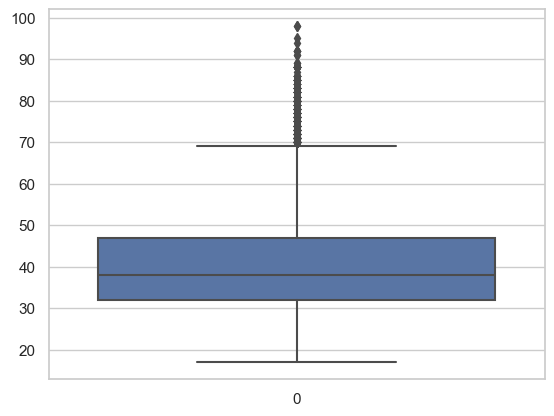

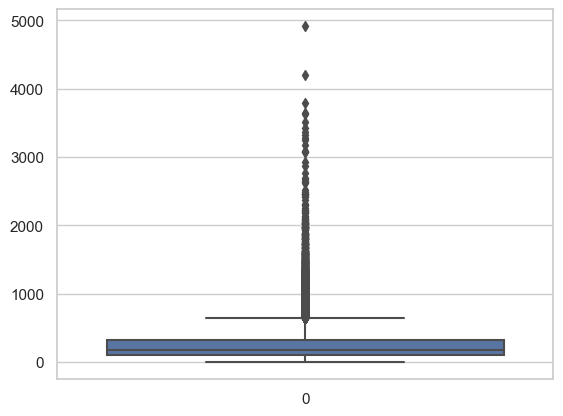

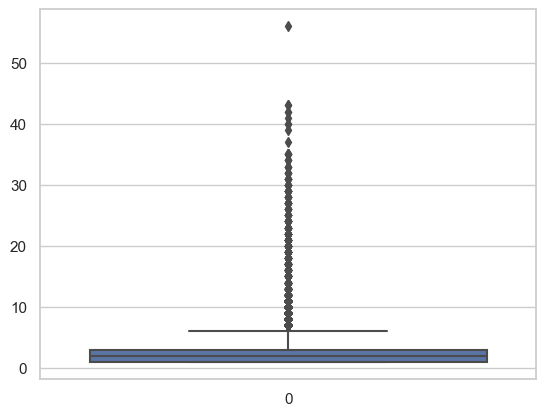

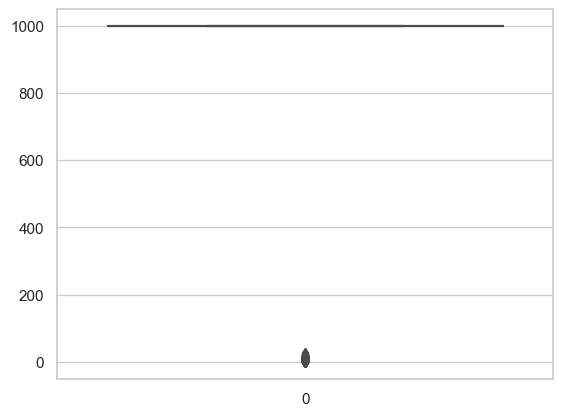

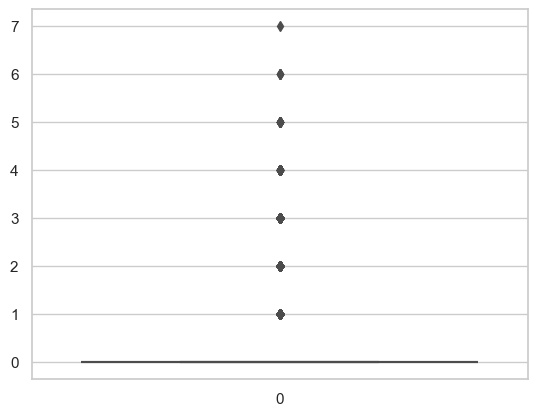

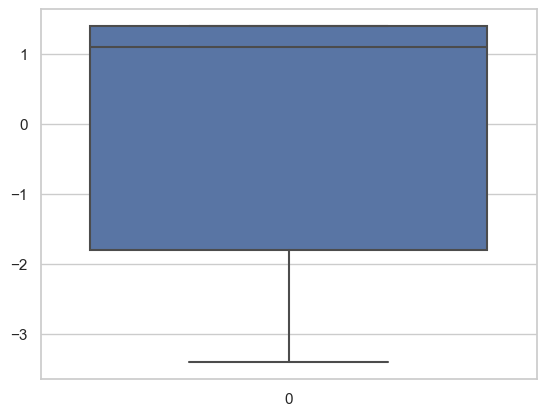

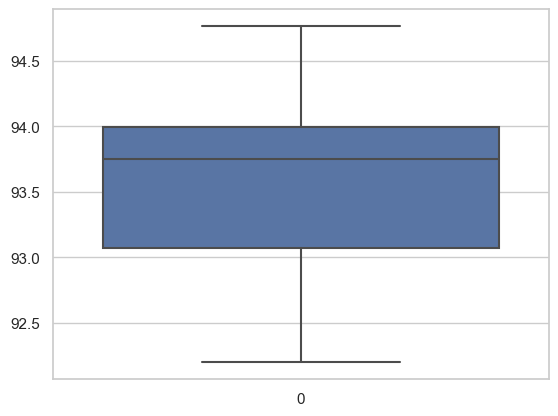

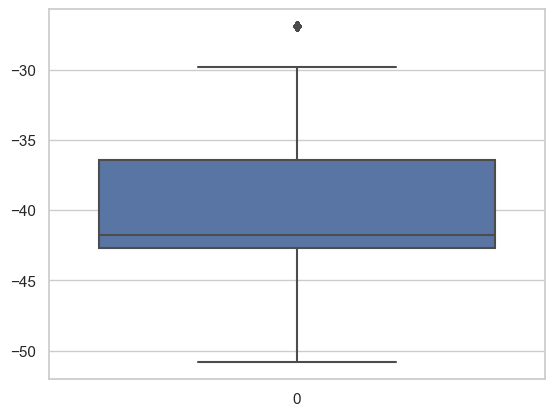

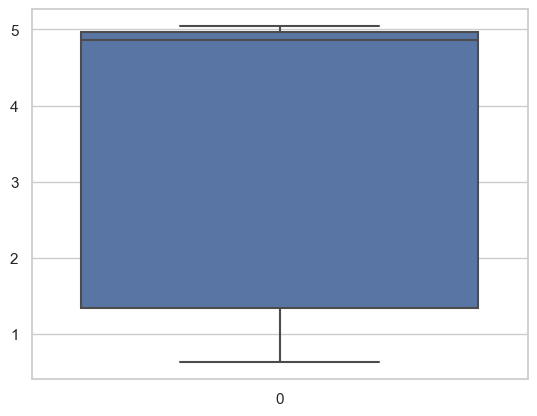

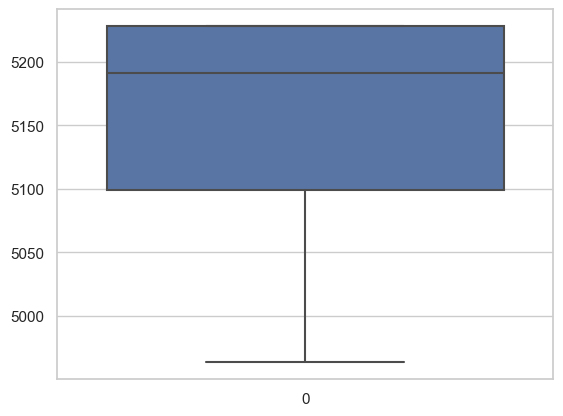

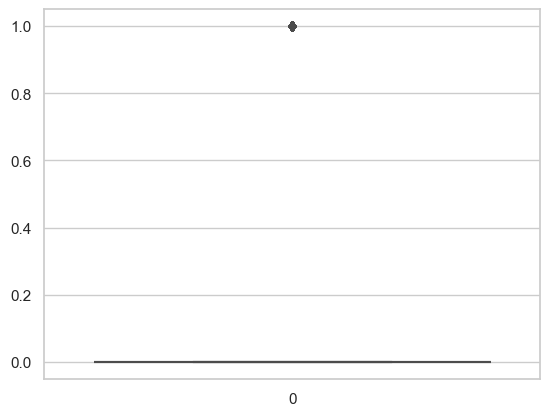

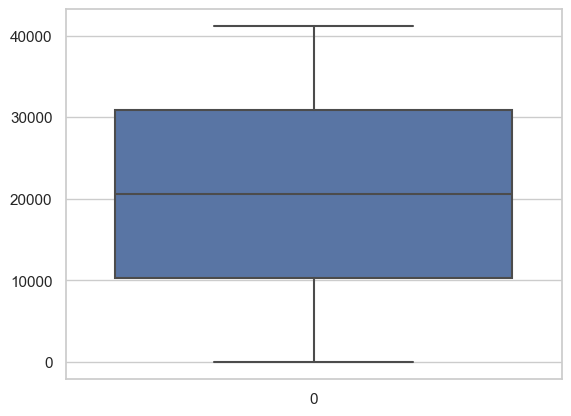

In [40]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

In [41]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [42]:
num_data.apply(outliertreat_IQR)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,row_num
0,9.5,-223.5,-2.0,999.0,0.0,-6.6,91.6965,-52.15,-4.0815,4905.6,0.0,-20586.5
1,69.5,644.5,6.0,999.0,0.0,6.2,95.3725,-26.95,10.3865,5421.6,0.0,61763.5


# ***Merging the numerical data and the categorical data***

In [43]:
cat_data.shape

(41176, 10)

In [44]:
cat_data.head(3)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university_degree,no,yes,no,cellular,jun,thu,success


In [45]:
num_data.shape

(41176, 12)

In [46]:
num_data.head(3)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,row_num
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,2
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,3


In [47]:
cat_data['row'] = data['row_num']

C:\Users\VJahn\AppData\Local\Temp\ipykernel_18652\615142602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['row'] = data['row_num']


In [48]:
merge_data = pd.merge(num_data,cat_data,how = 'inner', left_on = 'row_num', right_on = 'row')

In [49]:
merge_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,row
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,married,Basic,unknown,yes,no,cellular,aug,thu,nonexistent,1
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,married,unknown,no,no,no,cellular,nov,fri,nonexistent,2
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,single,university_degree,no,yes,no,cellular,jun,thu,success,3
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,married,high_school,no,no,no,cellular,apr,fri,nonexistent,4
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,married,Basic,no,yes,no,cellular,aug,fri,success,5


# ***ONE-HOT ENCODING***

In [50]:
cat_data.nunique()

job               12
marital            4
education          6
default            3
housing            3
loan               3
contact            2
month             10
day_of_week        5
poutcome           3
row            41176
dtype: int64

In [51]:
cat_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'row'],
      dtype='object')

In [52]:
final_data = pd.get_dummies(merge_data,columns = ['marital', 'housing', 'loan', 'contact', 'poutcome'],dtype = int)

In [53]:
final_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,1,1,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,1,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,1,1,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,1,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,1,1,0,0,1,0,0,0,1


# ***Checking Probabilty Distributuion***

C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VJahn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

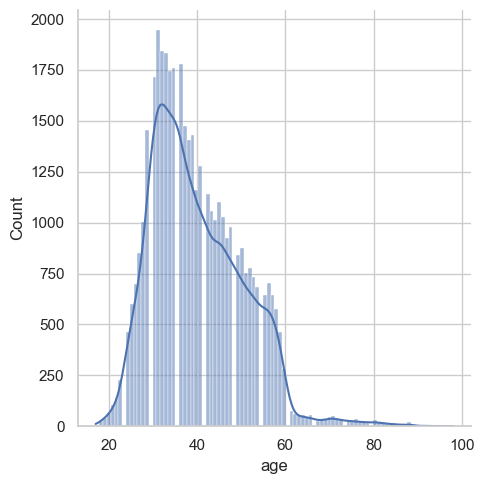

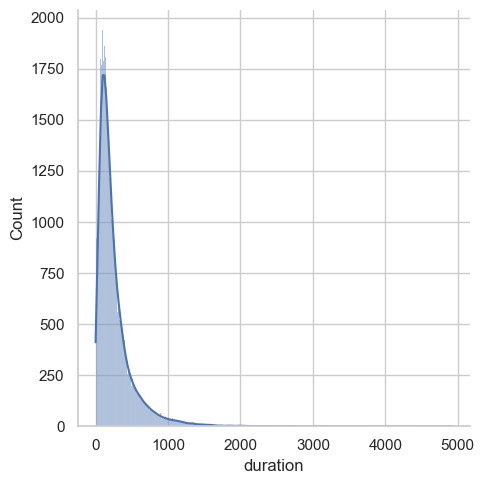

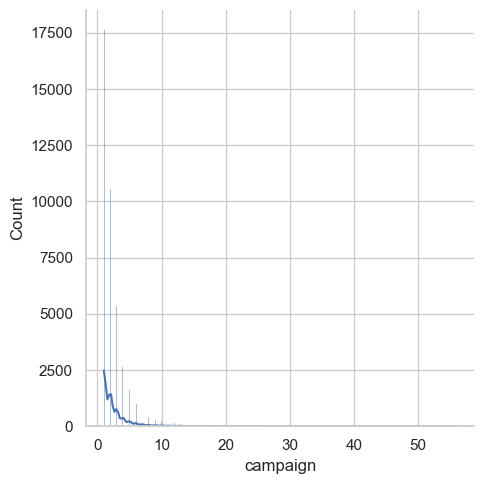

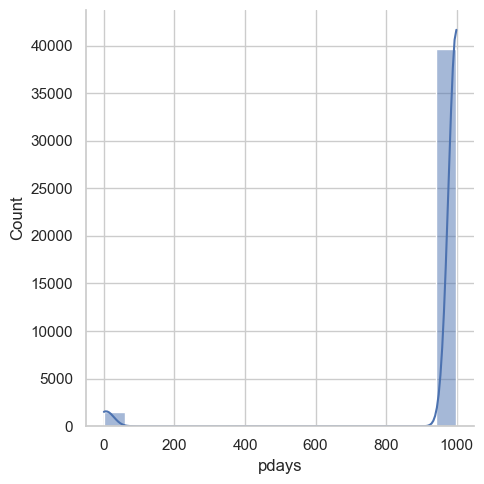

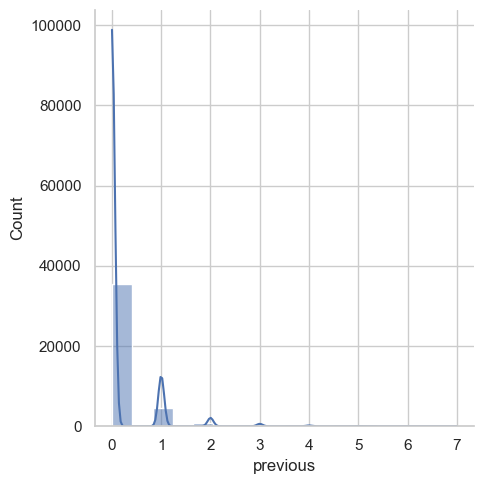

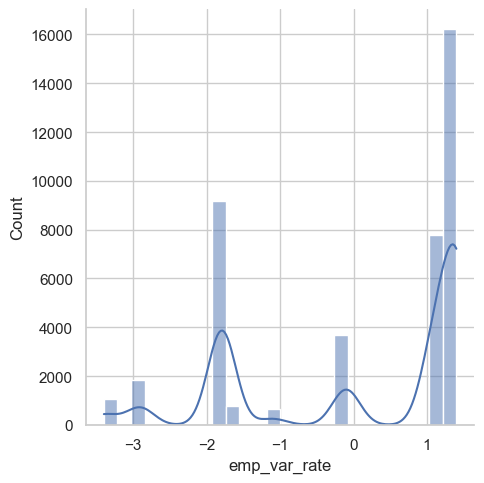

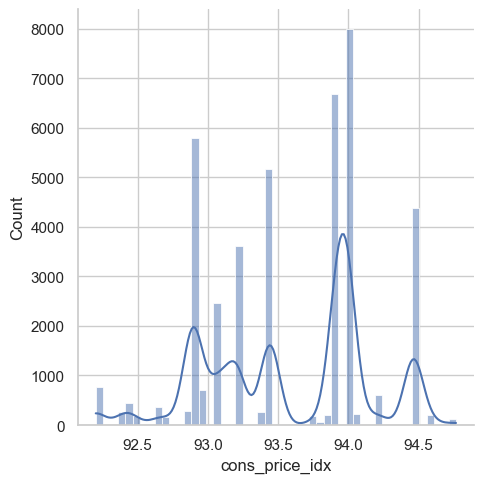

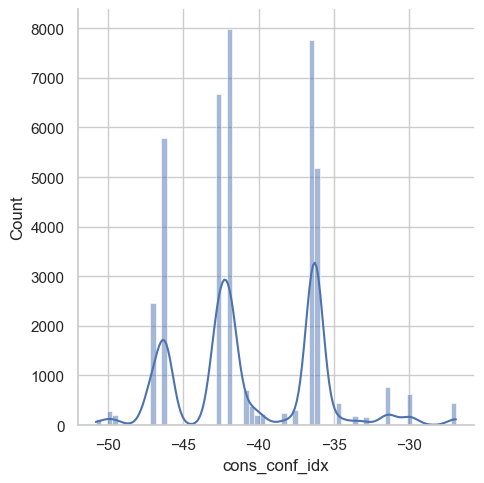

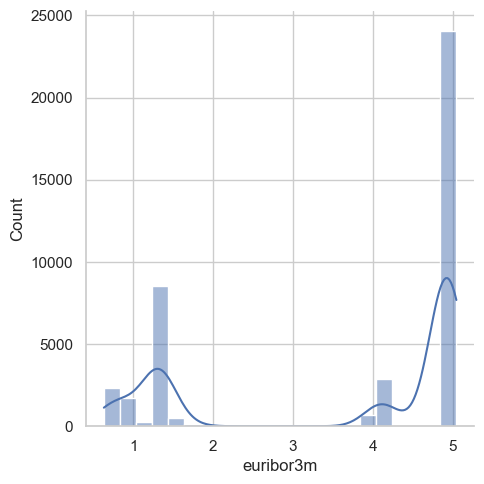

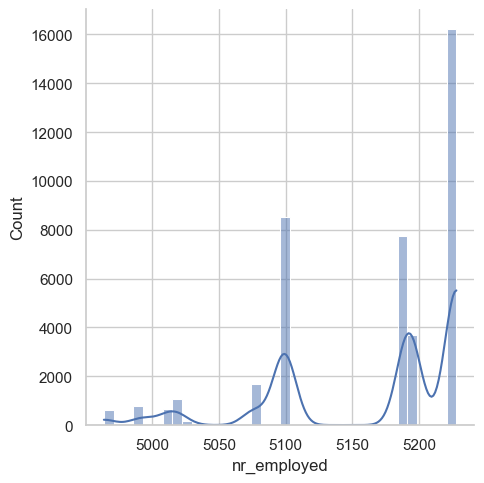

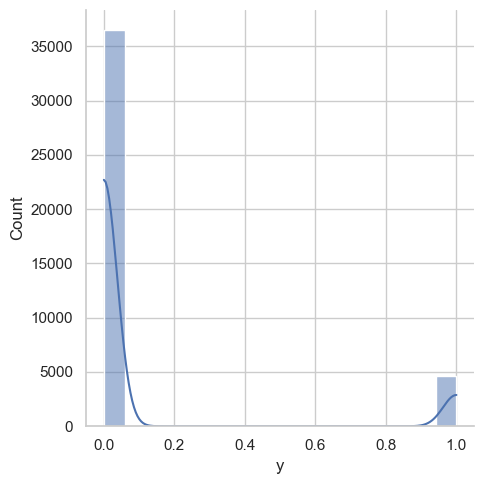

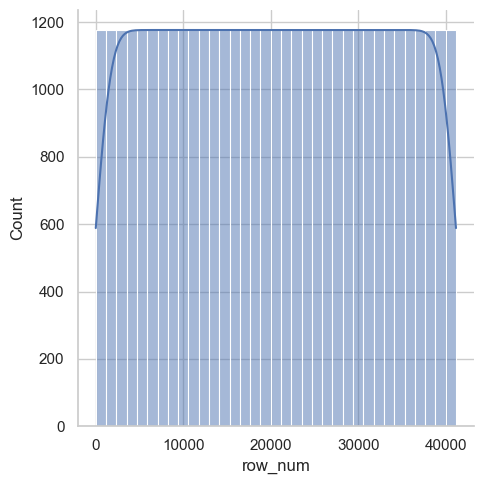

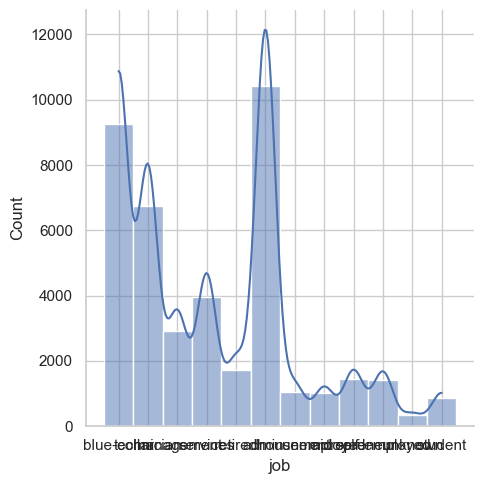

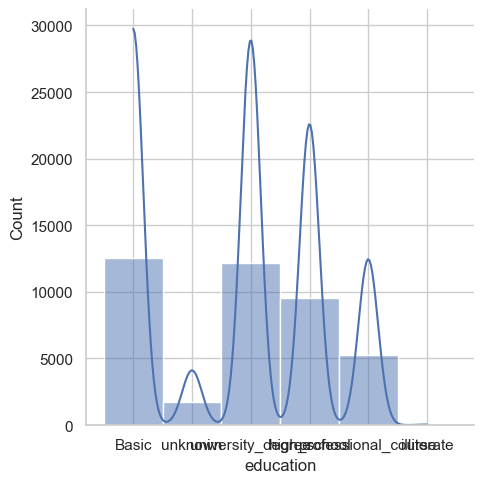

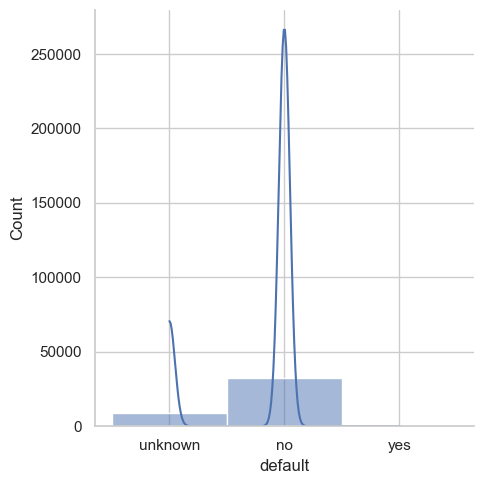

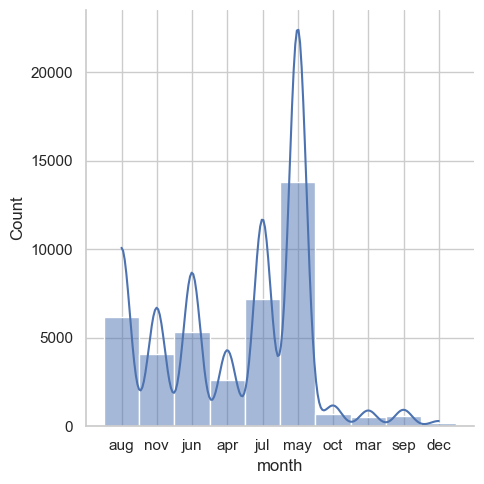

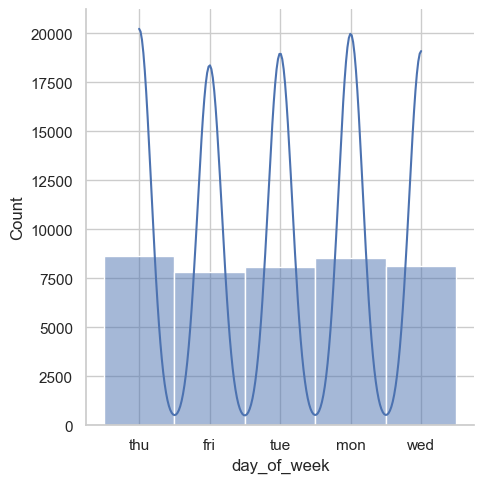

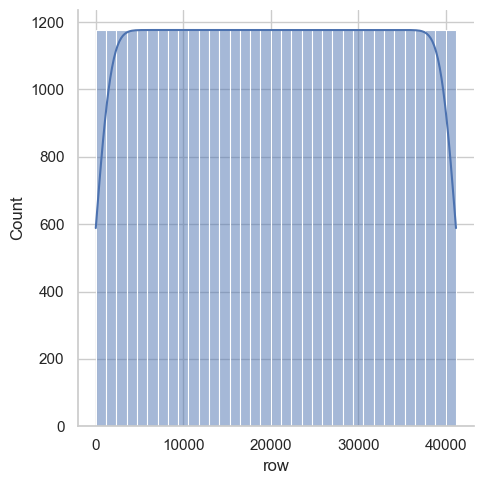

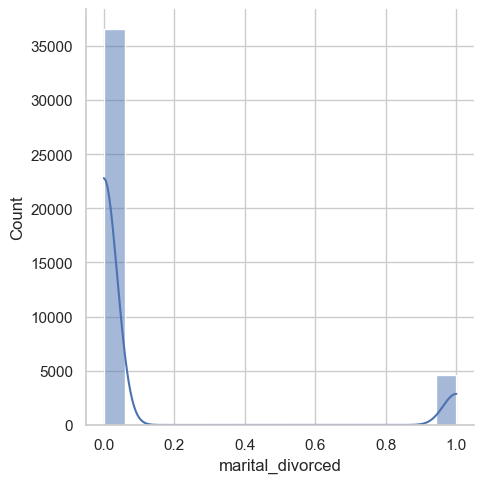

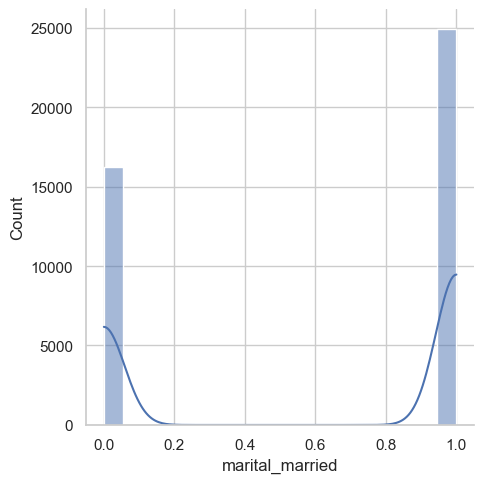

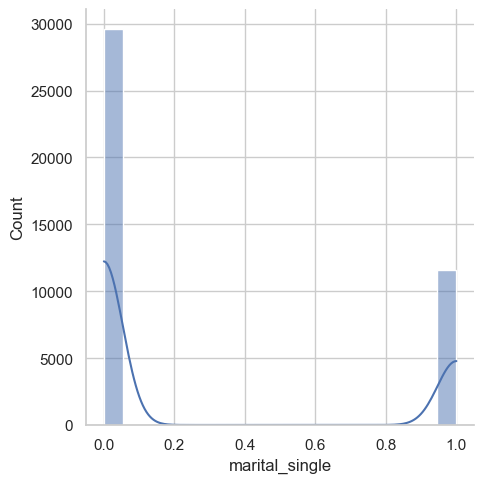

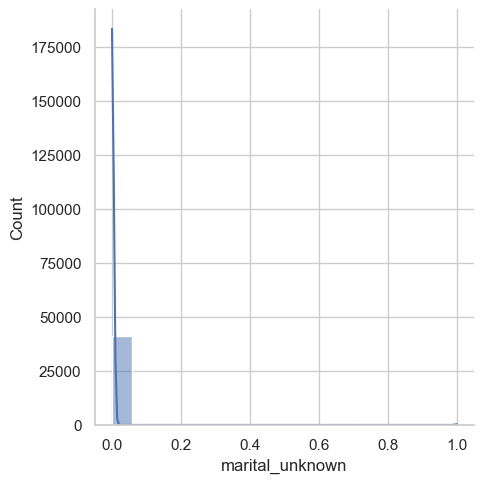

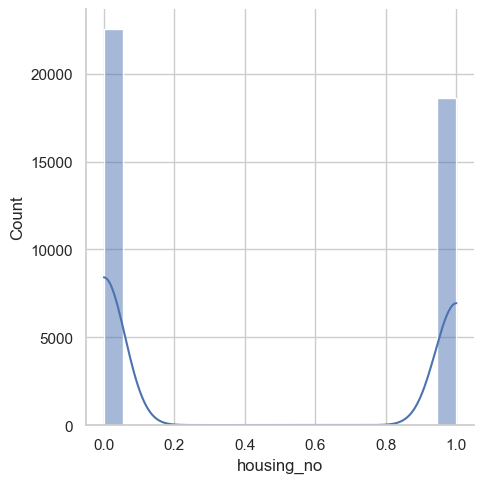

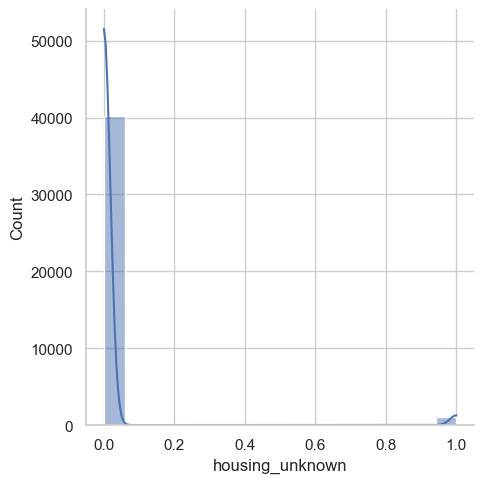

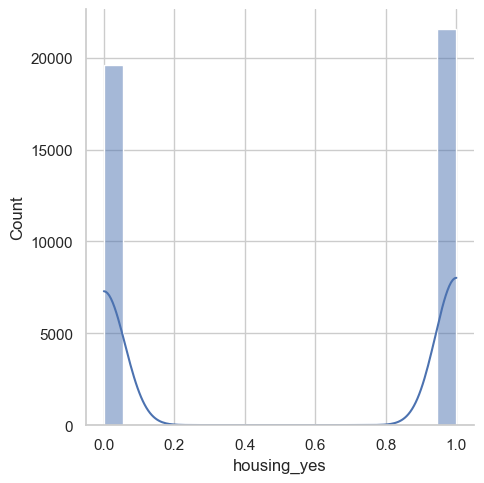

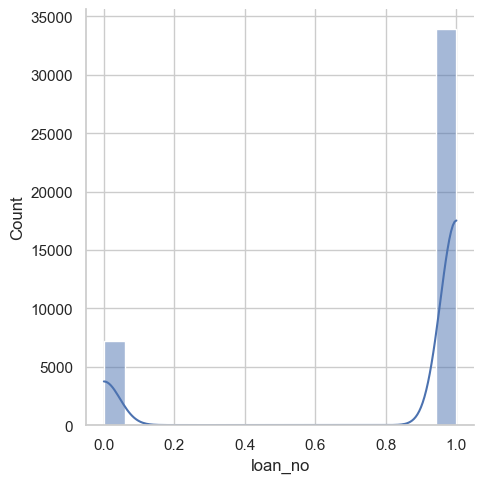

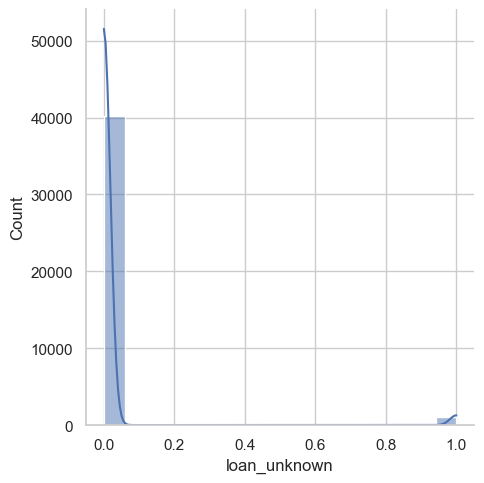

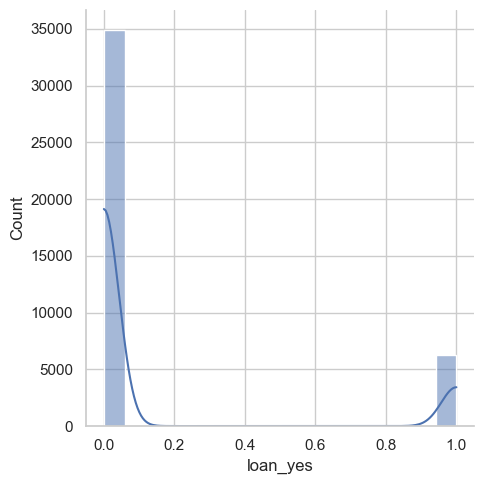

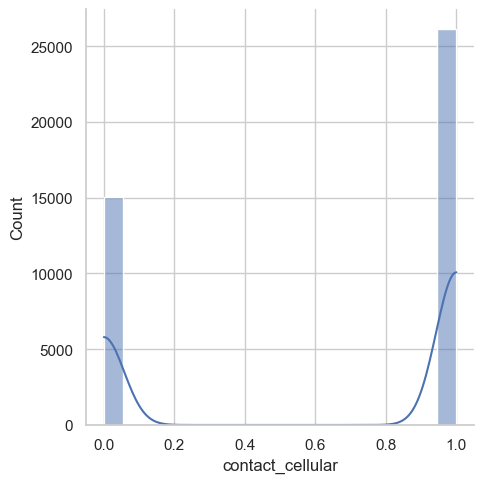

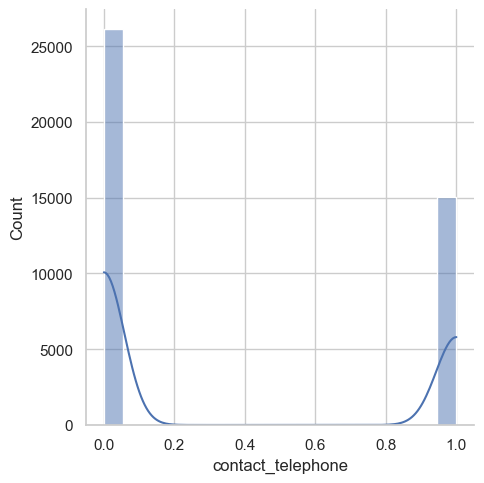

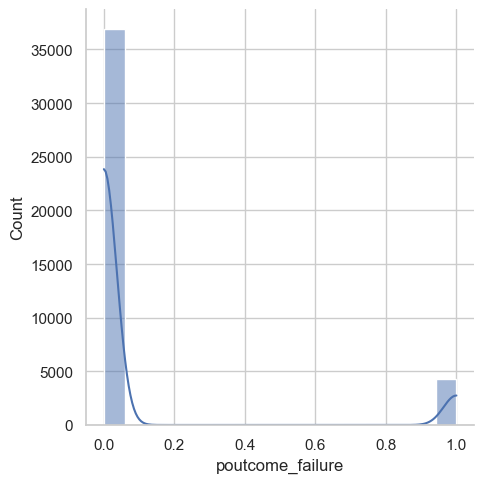

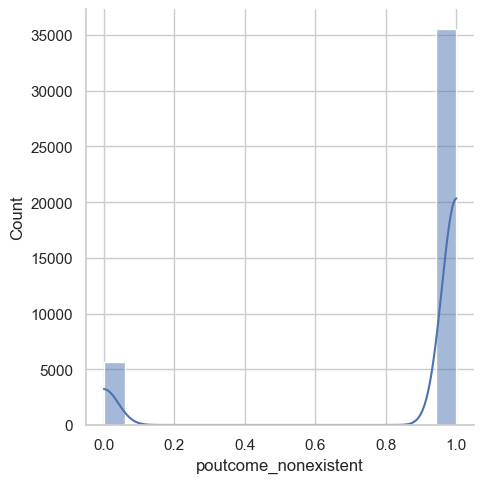

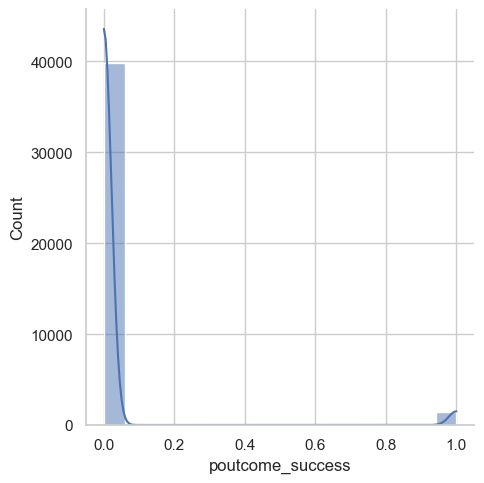

In [54]:
for col in final_data.columns:
    sns.displot(final_data[col],kde = True)

# ***Applying Logarithmic Transformation***

In [55]:
#for col in final_data.columns:
   # sns.displot(np.log(final_data[col]),kde = True)

In [56]:
#final_data['log_age '] = np.log(final_data['age'])
#final_data['log_dur'] = np.log(final_data['duration'])
#final_data['log_camp'] = np.log(final_data['campaign'])
#final_data['log_pday'] = np.log(final_data['pdays'])
#final_data['log_prev'] = np.log(final_data['previous'])

In [57]:
#final_data.head()

In [58]:
#final_data = final_data.drop(columns='age')
#final_data = final_data.drop(columns='duration')
#final_data = final_data.drop(columns='campaign')
#final_data = final_data.drop(columns='pdays')
#final_data = final_data.drop(columns='previous')

In [59]:
#final_data.head()

# **Split train-test data**

In [64]:
x = data.drop(['y'], axis=1)  #X = claims_1.drop(['fraudulent'],axis=1)

y = data['y']                 #y = Claims_1['fraudulent']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [66]:
x_train.shape, x_test.shape

((28823, 21), (12353, 21))

# **Building a Naive Bayes Model**

In [75]:
#Gaussian distribution/Normal distribution,so you don't have to do any transformation to achieve normal distribution , it is done automatically by the GaussianNB().
gnb = GaussianNB().fit(x_train, y_train)

ValueError: could not convert string to float: 'technician'

In [ ]:
y_train_pred = gnb.predict(x_train)

In [ ]:
y_train_pred = pd.Series(y_train_pred)

In [ ]:
data_train = pd.DataFrame(y_train)

In [ ]:
data_train['y_pred'] = y_train_pred

In [ ]:
data_train

In [ ]:
pd.crosstab(data_train.y, data_train.y_pred, margins = True)

In [ ]:
data_table = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix\n\n', data_table)

print('\nTrue Positives(TP) = ', data_table[0,0])

print('\nTrue Negatives(TN) = ', data_table[1,1])

print('\nFalse Positives(FP) = ', data_table[0,1])

print('\nFalse Negatives(FN) = ', data_table[1,0])

data_table.shape

In [ ]:
matrix = pd.DataFrame(data=data_table, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_train, y_train_pred))

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

In [ ]:
y_test_pred = gnb.predict(x_test)

In [ ]:
y_test_pred = pd.Series(y_test_pred)

In [ ]:
data_test = pd.DataFrame(y_test)

In [ ]:
data_test['y_pred'] = y_test_pred

In [ ]:
data_test

In [ ]:
pd.crosstab(data_test.y, data_test.y_pred, margins = True)

In [ ]:
data_table_test = confusion_matrix(y_test, y_test_pred)

print('Confusion matrix\n\n', data_table_test)

print('\nTrue Positives(TP) = ', data_table_test[0,0])

print('\nTrue Negatives(TN) = ', data_table_test[1,1])

print('\nFalse Positives(FP) = ', data_table_test[0,1])

print('\nFalse Negatives(FN) = ', data_table_test[1,0])

data_table_test.shape

In [ ]:
matrix = pd.DataFrame(data=data_table_test, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_test, y_test_pred))

In [ ]:
print('Model test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred)))